In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from astropy import units as u
import numpy as np
from astropy.nddata import CCDData
from matplotlib.colors import LogNorm
from astropy.table import QTable
import ccdproc
import csv

In [3]:
with open("SDSS_data_3.csv",'r') as f:
    with open("M67_data.csv",'w') as f1:
        f.readline()
        for line in f:
            f1.write(line)

In [4]:
M67 = QTable.read('M67_data.csv', format='ascii.csv')

M67

ra,dec,u,g,r,i,z
float64,float64,float64,float64,float64,float64,float64
132.525110534,11.8982736297,17.60795,15.96447,15.42083,15.22913,15.18159
132.525117681,11.898272116,17.6052,15.98772,15.42109,15.23687,15.18011
132.525182065,11.6814870178,21.64774,20.00674,19.67378,19.44922,19.32644
132.525187873,11.6815011841,21.42473,19.97981,19.68092,19.44344,19.33945
132.525200314,11.6814794416,21.11321,20.04713,19.62042,19.528,19.32639
132.52524562,12.059385889,24.69892,22.48737,21.78415,21.87045,21.15399
132.525252159,11.5561500866,24.71509,22.72417,21.51718,20.79985,20.82024
132.525256388,11.5561953011,23.58251,22.89453,22.04541,21.55546,21.4181
132.525285576,12.0594451554,22.83702,22.37156,21.55541,21.78055,21.68287


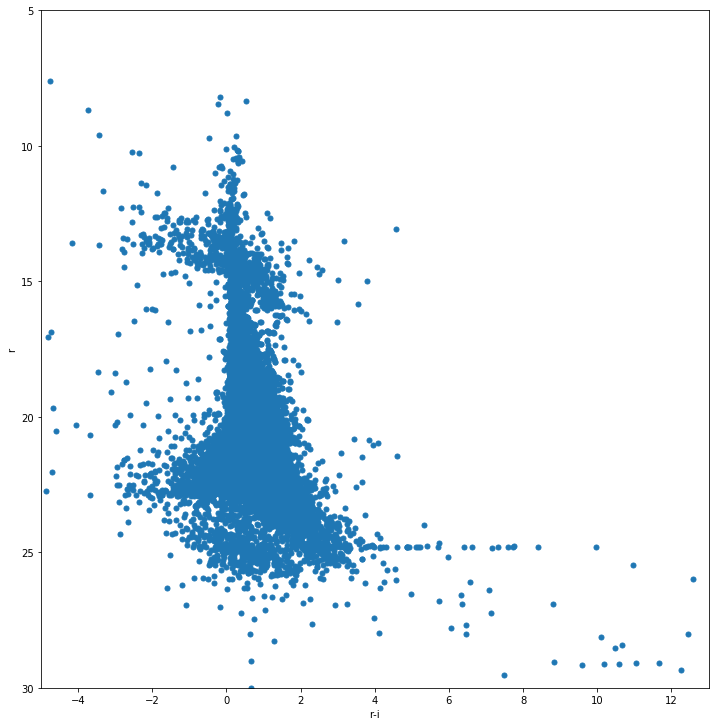

In [5]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,10)
fig.tight_layout()


x_axis = M67['r'] - M67['i']
y_axis = M67['r']

ax.set_xlabel("r-i")
ax.set_ylabel("r")
plt.ylim(30,5)
plt.xlim(-5,13)

ax.plot(x_axis,y_axis,marker="o",linestyle="None",markersize=5);

In [6]:
radius = 0.1

mask_small_r = np.where(radius > (((M67['dec'] - 11.8)**2 + (M67['ra'] - 132.825)**2)**0.5))

mask_large_r = np.where(radius < (((M67['dec'] - 11.8)**2 + (M67['ra'] - 132.825)**2)**0.5))

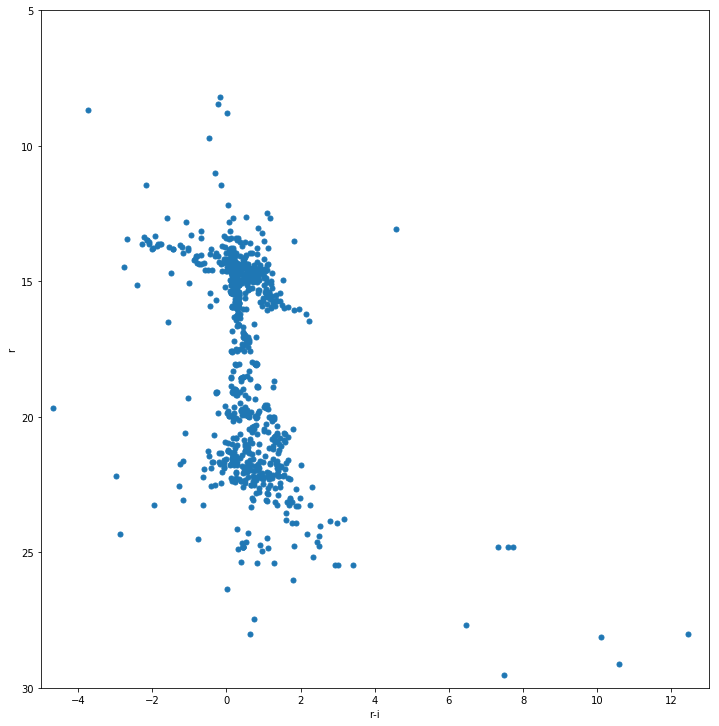

In [7]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,10)
fig.tight_layout()


x_axis = M67['r'][mask_small_r] - M67['i'][mask_small_r]
y_axis = M67['r'][mask_small_r]

ax.set_xlabel("r-i")
ax.set_ylabel("r")
plt.ylim(30,5)
plt.xlim(-5,13)

ax.plot(x_axis,y_axis,marker="o",linestyle="None",markersize=5);

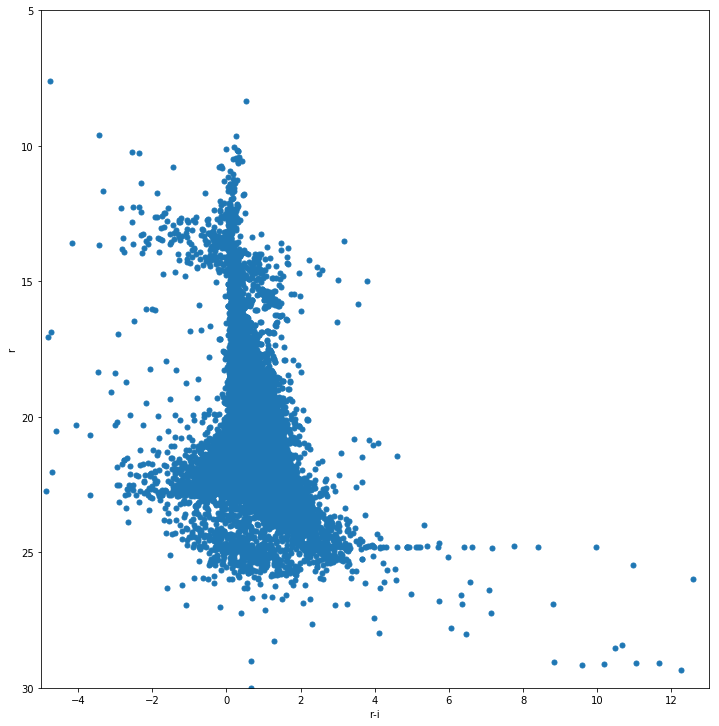

In [8]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,10)
fig.tight_layout()


x_axis = M67['r'][mask_large_r] - M67['i'][mask_large_r]
y_axis = M67['r'][mask_large_r]

ax.set_xlabel("r-i")
ax.set_ylabel("r")
plt.ylim(30,5)
plt.xlim(-5,13)

ax.plot(x_axis,y_axis,marker="o",linestyle="None",markersize=5);

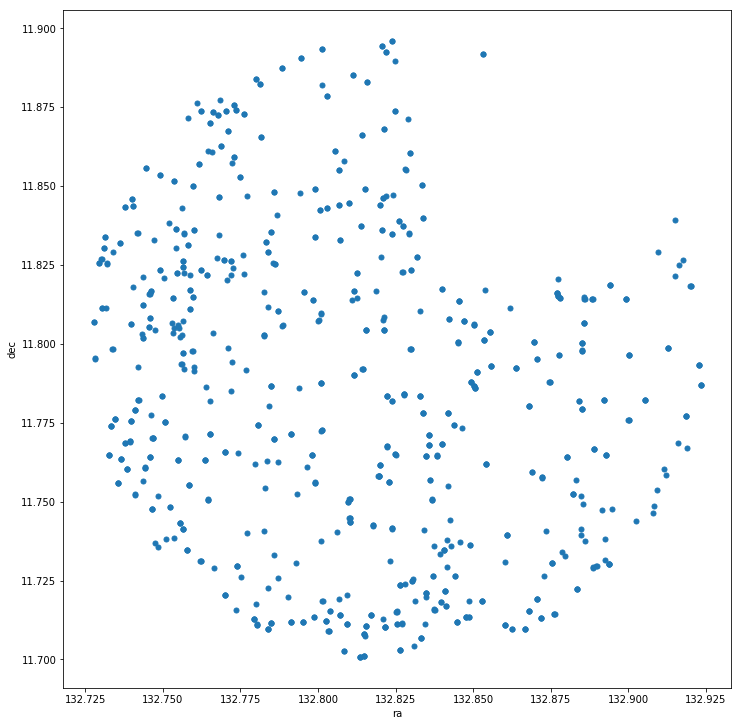

In [9]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,10)
fig.tight_layout()


x_axis = M67['ra'][mask_small_r]
y_axis = M67['dec'][mask_small_r]

ax.set_xlabel("ra")
ax.set_ylabel("dec")
#plt.ylim(30,5)
#plt.xlim(-5,13)

ax.plot(x_axis,y_axis,marker="o",linestyle="None",markersize=5);

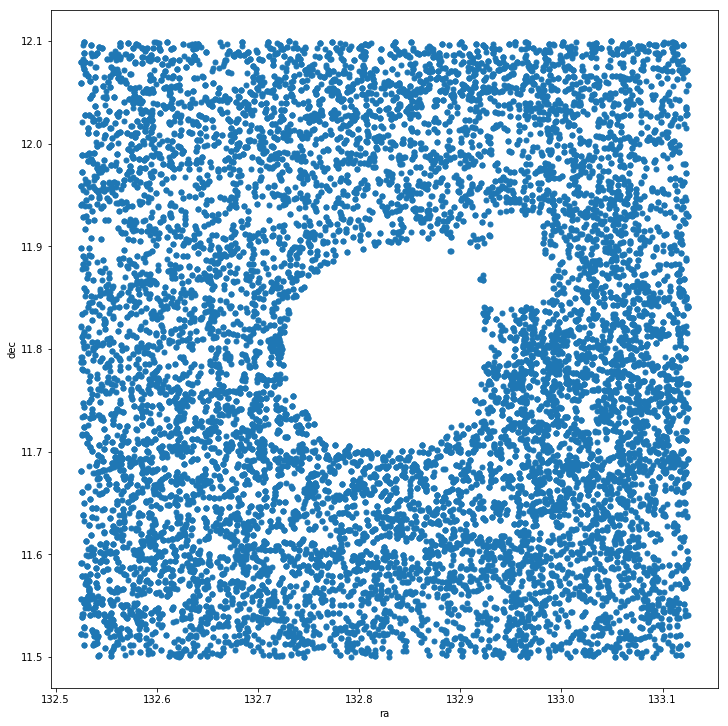

In [10]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,10)
fig.tight_layout()


x_axis = M67['ra'][mask_large_r]
y_axis = M67['dec'][mask_large_r]

ax.set_xlabel("ra")
ax.set_ylabel("dec")

ax.plot(x_axis,y_axis,marker="o",linestyle="None",markersize=5);

In [11]:
M67_WISE = QTable.read('WISE_data.txt', format='ascii.csv')

M67_WISE

ra,dec,w1,w2,w3,w4
float64,float64,float64,float64,float64,float64
132.8202405,11.8274139,13.34,13.516,12.525,8.816
132.8012007,11.7725719,11.696,11.744,12.165,9.032
132.8584874,11.8320794,12.863,12.958,12.43,8.842
132.8008664,11.8095117,12.309,12.374,12.367,8.88
132.8512518,11.830743,13.122,13.13,12.392,8.224
132.8027908,11.801811,14.904,15.291,12.05,8.914
132.8469762,11.8073237,12.014,12.047,11.708,8.665
132.840036,11.8173505,13.326,13.385,12.509,8.523
132.7912911,11.7713581,12.831,12.816,12.588,8.721


In [12]:
with open("SDSS_2x2.csv",'r') as f:
    with open("M67_SDSS_2x2.csv",'w') as f1:
        f.readline()
        for line in f:
            f1.write(line)

M67_SDSS_2x2 = QTable.read('M67_SDSS_2x2.csv', format='ascii.csv')

M67_SDSS_2x2

ra,dec,u,g,r,i,z
float64,float64,float64,float64,float64,float64,float64
132.810925128,11.8139517577,22.08042,18.10702,16.92719,16.44679,16.19942
132.811468083,11.7899922763,14.77175,14.58141,15.01164,14.86949,13.13242
132.811481196,11.78998899,15.30811,15.5375,15.33619,14.75659,13.85557
132.811486947,11.789997206,15.04217,14.15382,14.67269,14.05976,13.4315
132.81170287,11.8166384536,17.47872,15.76027,15.14673,14.92426,14.84903
132.811706669,11.816632486,17.56272,15.81277,15.10377,14.91419,14.87547
132.812508912,11.8145567769,22.29547,18.39513,17.14668,16.54996,16.23112
132.814324286,11.7920630968,14.901,14.29721,14.63216,14.63935,13.33438
132.814344323,11.7920687047,14.80442,14.59984,14.37839,14.10358,13.50087


In [13]:
with open("CDS_Crossmatch_WISE.csv",'r') as f:
    with open("M67_Crossmatch.csv",'w') as f1:
        f.readline()
        f.readline()
        f.readline()
        f.readline()
        for line in f:
            f1.write(line)

M67_Crossmatch = QTable.read('M67_Crossmatch.csv', format='ascii.csv')

In [14]:
M67_Crossmatch

angDist,ra,dec,u,g,r,i,z,JNAME,ra_,dec_,errHalfMaj,errHalfMin,errPosAng,W1mag,W2mag,W3mag,W4mag,Jmag,Hmag,Kmag,e_W1mag,e_W2mag,e_W3mag,e_W4mag,e_Jmag,e_Hmag,e_Kmag,cntr,cc_flags,ext_flg,var_flg,ph_qual,r_2mass
float64,float64,float64,float64,float64,float64,float64,float64,str19,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str19,str4,int32,str4,str4,float64
0.105208,132.811468083,11.7899922763,14.77175,14.58141,15.01164,14.86949,13.13242,J085114.75+114723.9,132.811498,11.789993,0.093,0.087,24,11.381,11.408,11.523,8.387,11.747,11.495,11.43,0.026,0.023,0.197,nan,0.021,0.022,0.018,1328112101241010745,0000,0,00nn,AABU,0.083
0.060744,132.811481196,11.78998899,15.30811,15.5375,15.33619,14.75659,13.85557,J085114.75+114723.9,132.811498,11.789993,0.093,0.087,24,11.381,11.408,11.523,8.387,11.747,11.495,11.43,0.026,0.023,0.197,nan,0.021,0.022,0.018,1328112101241010745,0000,0,00nn,AABU,0.083
0.041487,132.811486947,11.789997206,15.04217,14.15382,14.67269,14.05976,13.4315,J085114.75+114723.9,132.811498,11.789993,0.093,0.087,24,11.381,11.408,11.523,8.387,11.747,11.495,11.43,0.026,0.023,0.197,nan,0.021,0.022,0.018,1328112101241010745,0000,0,00nn,AABU,0.083
0.401643,132.81170287,11.8166384536,17.47872,15.76027,15.14673,14.92426,14.84903,J085114.83+114859.7,132.811811,11.816604,0.13,0.111,95,13.389,13.401,12.173,8.632,13.911,13.485,13.438,0.028,0.039,nan,nan,0.027,0.033,0.035,1328112101241011048,hh00,1,nnnn,AAUU,0.229
0.382589,132.811706669,11.816632486,17.56272,15.81277,15.10377,14.91419,14.87547,J085114.83+114859.7,132.811811,11.816604,0.13,0.111,95,13.389,13.401,12.173,8.632,13.911,13.485,13.438,0.028,0.039,nan,nan,0.027,0.033,0.035,1328112101241011048,hh00,1,nnnn,AAUU,0.229
2.274567,132.812508912,11.8145567769,22.29547,18.39513,17.14668,16.54996,16.23112,J085114.85+114851.7,132.811894,11.814366,0.167,0.132,90,13.789,13.776,12.015,8.821,14.96,14.339,14.218,0.031,0.047,nan,nan,0.044,0.053,0.062,1328112101241011049,hh00,1,nnnn,AAUU,2.62
0.117115,132.814324286,11.7920630968,14.901,14.29721,14.63216,14.63935,13.33438,J085115.44+114731.4,132.814358,11.792063,0.08,0.076,159,11.391,11.401,11.35,9.131,11.708,11.475,11.43,0.022,0.022,0.166,nan,0.021,0.02,0.018,1328112101241010751,hh00,0,01nn,AABU,0.055
0.050499,132.814344323,11.7920687047,14.80442,14.59984,14.37839,14.10358,13.50087,J085115.44+114731.4,132.814358,11.792063,0.08,0.076,159,11.391,11.401,11.35,9.131,11.708,11.475,11.43,0.022,0.022,0.166,nan,0.021,0.02,0.018,1328112101241010751,hh00,0,01nn,AABU,0.055
0.044962,132.814344797,11.7920622931,15.54364,14.99927,14.73315,14.45643,13.87328,J085115.44+114731.4,132.814358,11.792063,0.08,0.076,159,11.391,11.401,11.35,9.131,11.708,11.475,11.43,0.022,0.022,0.166,nan,0.021,0.02,0.018,1328112101241010751,hh00,0,01nn,AABU,0.055


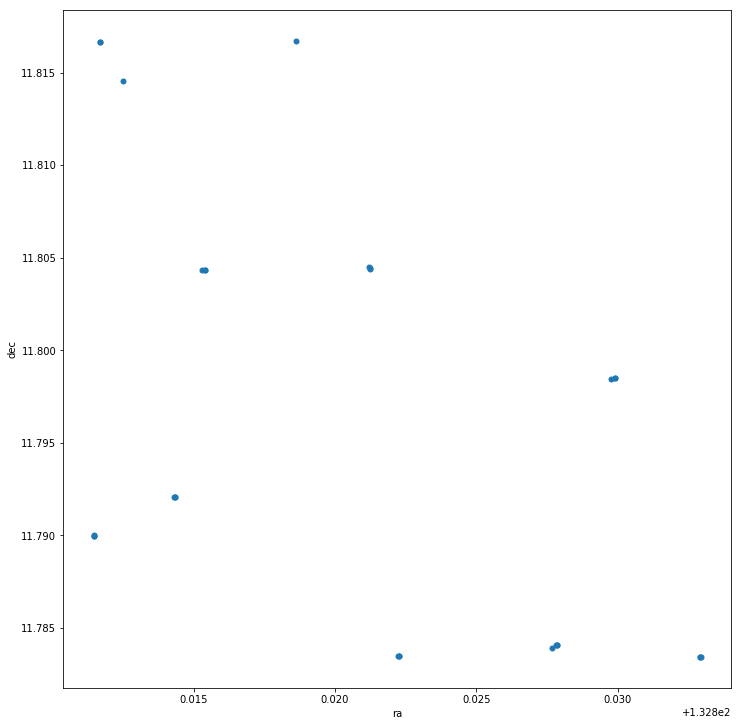

In [15]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,10)
fig.tight_layout()


x_axis = M67_Crossmatch['ra']
y_axis = M67_Crossmatch['dec']

ax.set_xlabel("ra")
ax.set_ylabel("dec")

ax.plot(x_axis,y_axis,marker="o",linestyle="None",markersize=5);

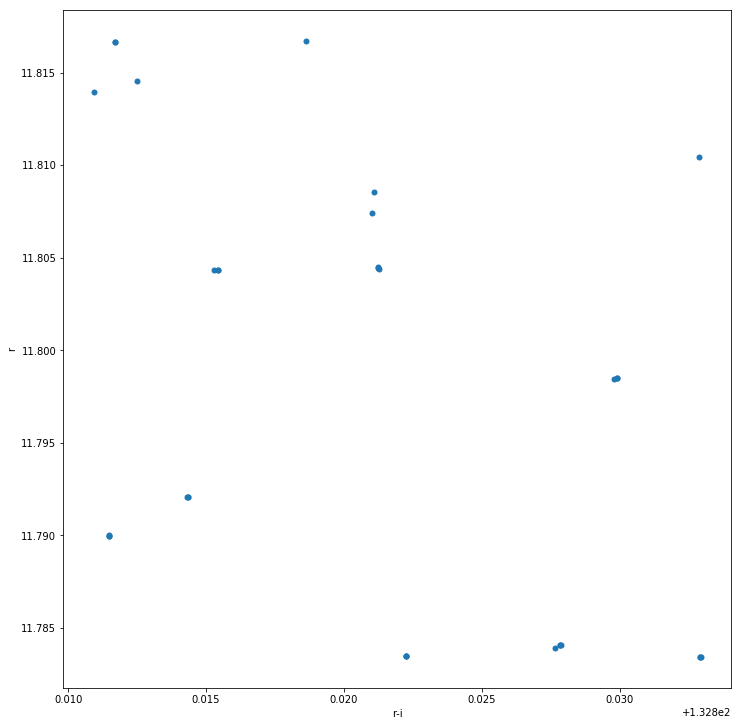

In [16]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,10)
fig.tight_layout()


x_axis = M67_SDSS_2x2['ra']
y_axis = M67_SDSS_2x2['dec']

ax.set_xlabel("r-i")
ax.set_ylabel("r")

ax.plot(x_axis,y_axis,marker="o",linestyle="None",markersize=5);

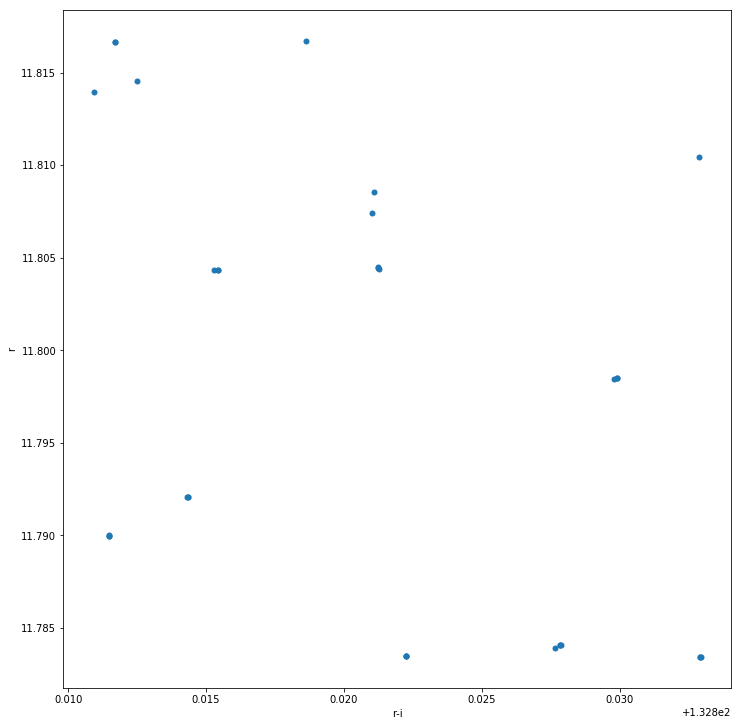

In [17]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,10)
fig.tight_layout()


x_axis = M67_SDSS_2x2['ra']
y_axis = M67_SDSS_2x2['dec']

ax.set_xlabel("r-i")
ax.set_ylabel("r")

ax.plot(x_axis,y_axis,marker="o",linestyle="None",markersize=5);

## Final Plots Are Below Here

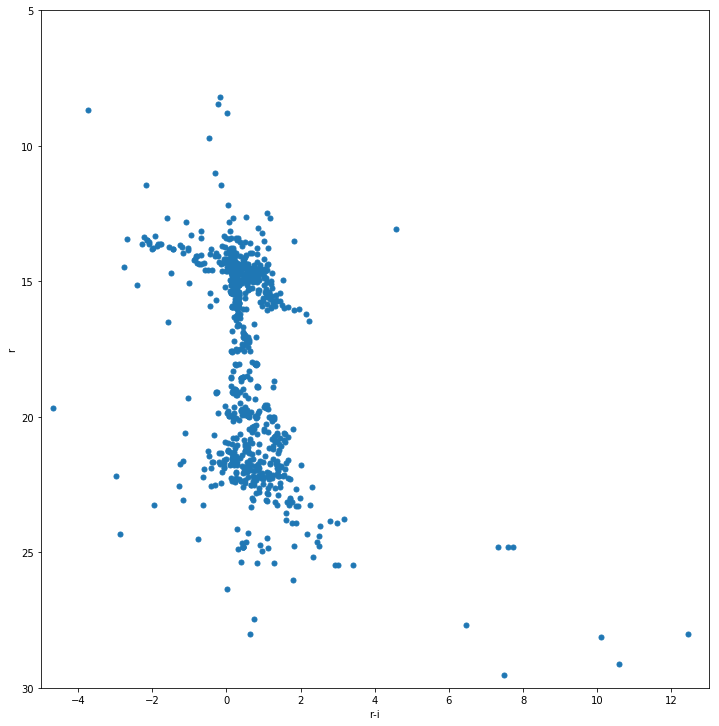

In [18]:
#r - i vs r for small radius
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,10)
fig.tight_layout()


x_axis = M67['r'][mask_small_r] - M67['i'][mask_small_r]
y_axis = M67['r'][mask_small_r]

ax.set_xlabel("r-i")
ax.set_ylabel("r")
plt.ylim(30,5)
plt.xlim(-5,13)

ax.plot(x_axis,y_axis,marker="o",linestyle="None",markersize=5);

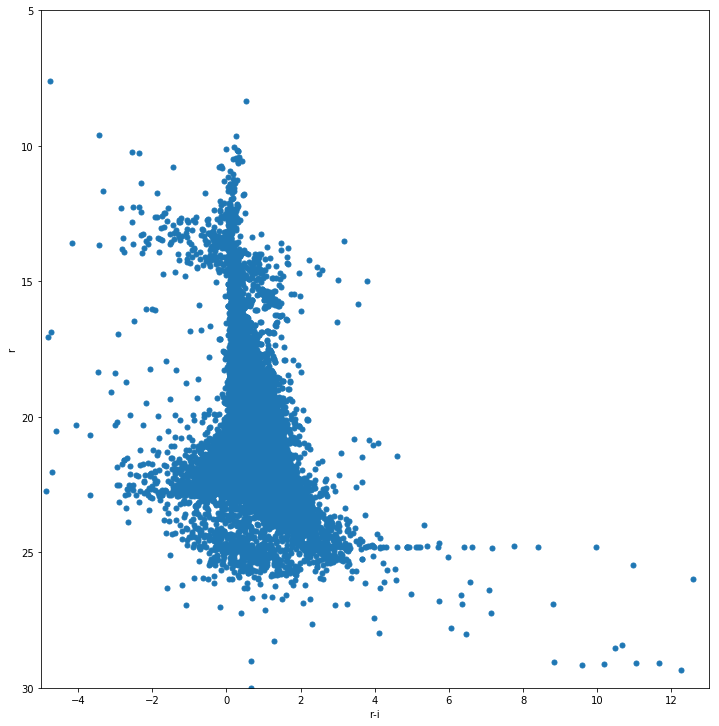

In [19]:
#r - i vs r for large radius
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,10)
fig.tight_layout()


x_axis = M67['r'][mask_large_r] - M67['i'][mask_large_r]
y_axis = M67['r'][mask_large_r]

ax.set_xlabel("r-i")
ax.set_ylabel("r")
plt.ylim(30,5)
plt.xlim(-5,13)

ax.plot(x_axis,y_axis,marker="o",linestyle="None",markersize=5);

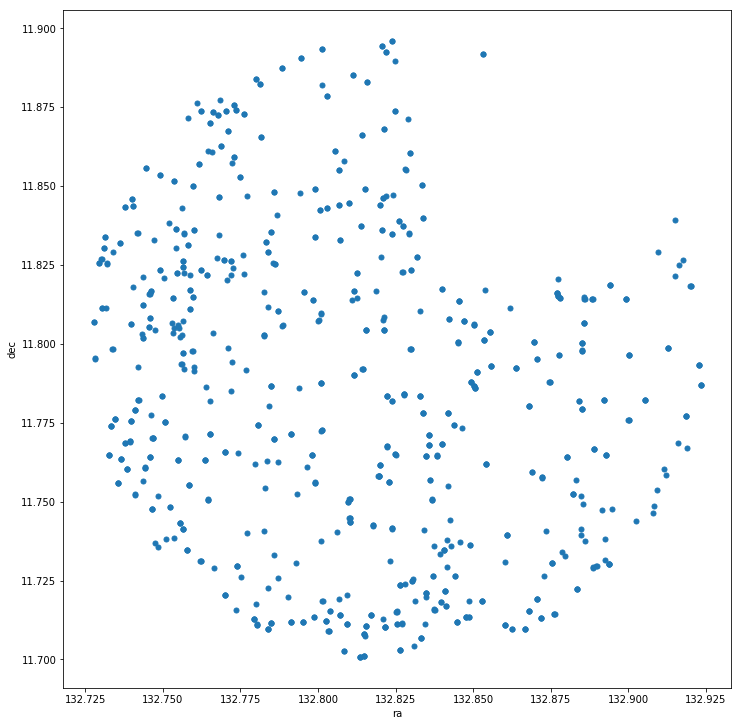

In [20]:
#Positions of stars inside small radius

fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,10)
fig.tight_layout()


x_axis = M67['ra'][mask_small_r]
y_axis = M67['dec'][mask_small_r]

ax.set_xlabel("ra")
ax.set_ylabel("dec")
#plt.ylim(30,5)
#plt.xlim(-5,13)

ax.plot(x_axis,y_axis,marker="o",linestyle="None",markersize=5);

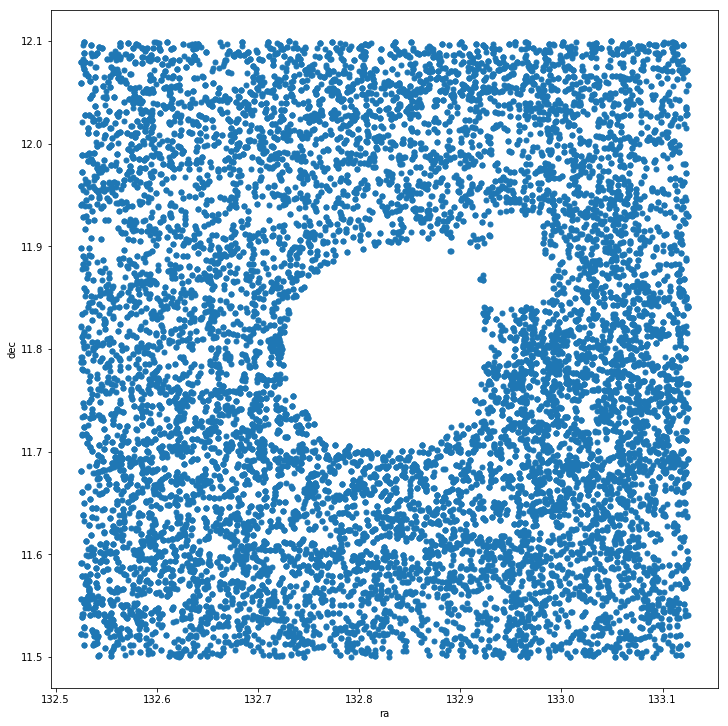

In [21]:
#Positions of stars outside small radius
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,10)
fig.tight_layout()


x_axis = M67['ra'][mask_large_r]
y_axis = M67['dec'][mask_large_r]

ax.set_xlabel("ra")
ax.set_ylabel("dec")

ax.plot(x_axis,y_axis,marker="o",linestyle="None",markersize=5);

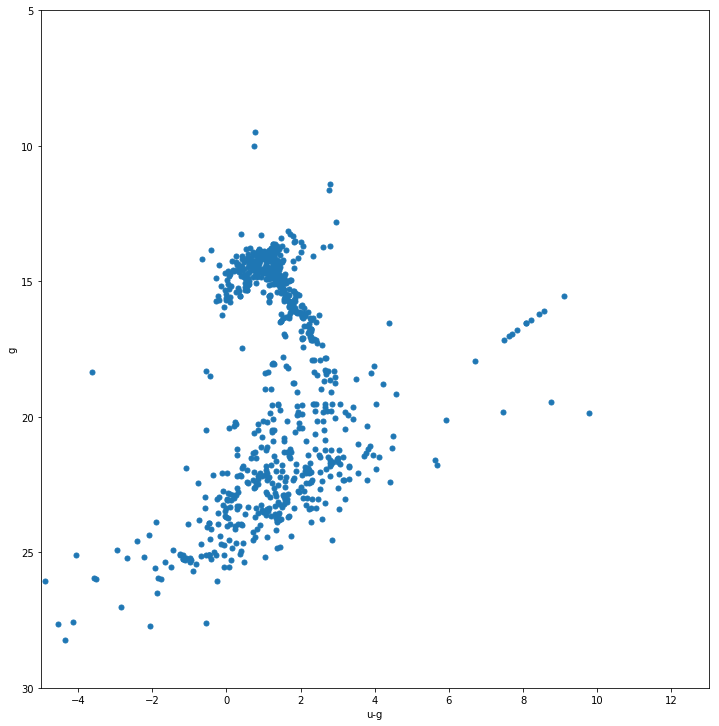

In [22]:
#u - g vs g for small radius
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,10)
fig.tight_layout()


x_axis = M67['u'][mask_small_r] - M67['g'][mask_small_r]
y_axis = M67['g'][mask_small_r]

ax.set_xlabel("u-g")
ax.set_ylabel("g")
plt.ylim(30,5)
plt.xlim(-5,13)

ax.plot(x_axis,y_axis,marker="o",linestyle="None",markersize=5);

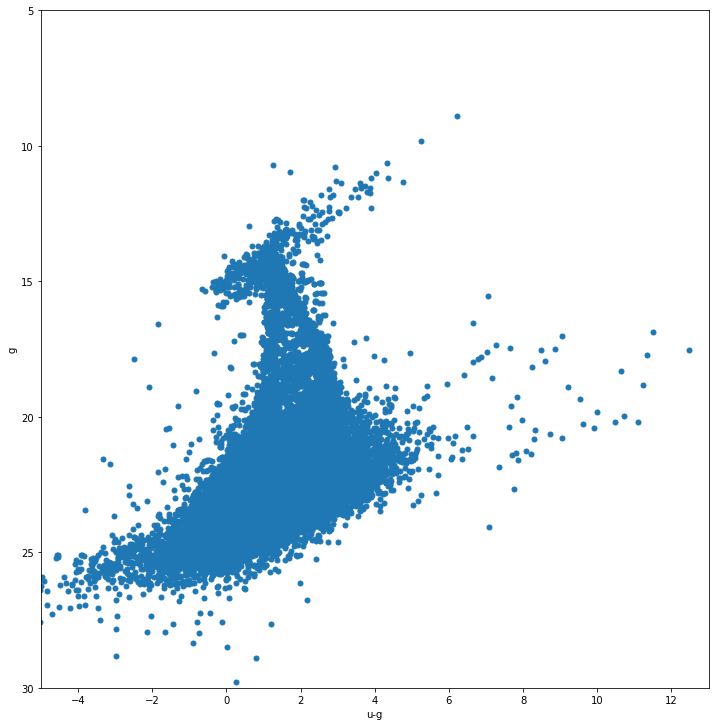

In [23]:
#u - g vs g for large radius
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,10)
fig.tight_layout()


x_axis = M67['u'][mask_large_r] - M67['g'][mask_large_r]
y_axis = M67['g'][mask_large_r]

ax.set_xlabel("u-g")
ax.set_ylabel("g")
plt.ylim(30,5)
plt.xlim(-5,13)

ax.plot(x_axis,y_axis,marker="o",linestyle="None",markersize=5);

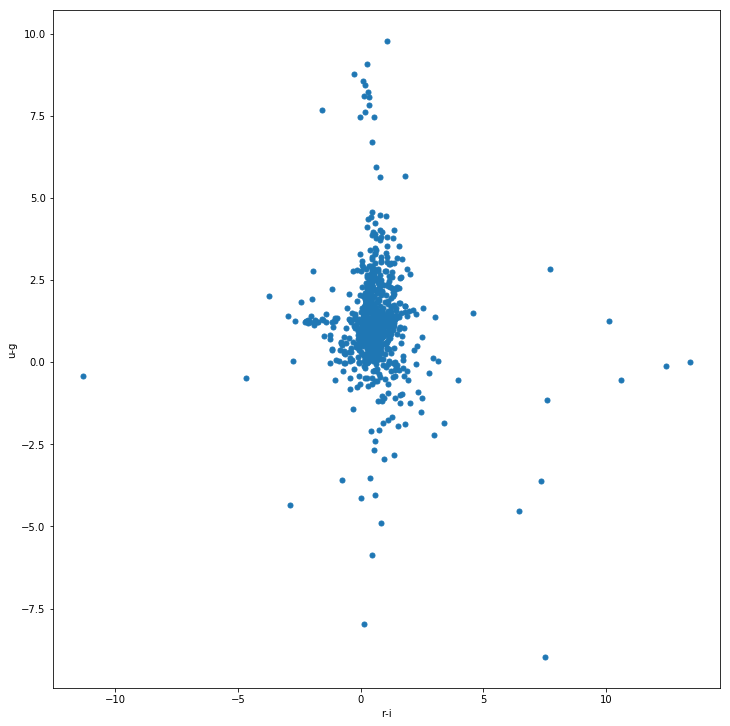

In [24]:
#r - i vs u - g for small radius
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,10)
fig.tight_layout()


x_axis = M67['r'][mask_small_r] - M67['i'][mask_small_r]
y_axis = M67['u'][mask_small_r] - M67['g'][mask_small_r]

ax.set_xlabel("r-i")
ax.set_ylabel("u-g")

ax.plot(x_axis,y_axis,marker="o",linestyle="None",markersize=5);

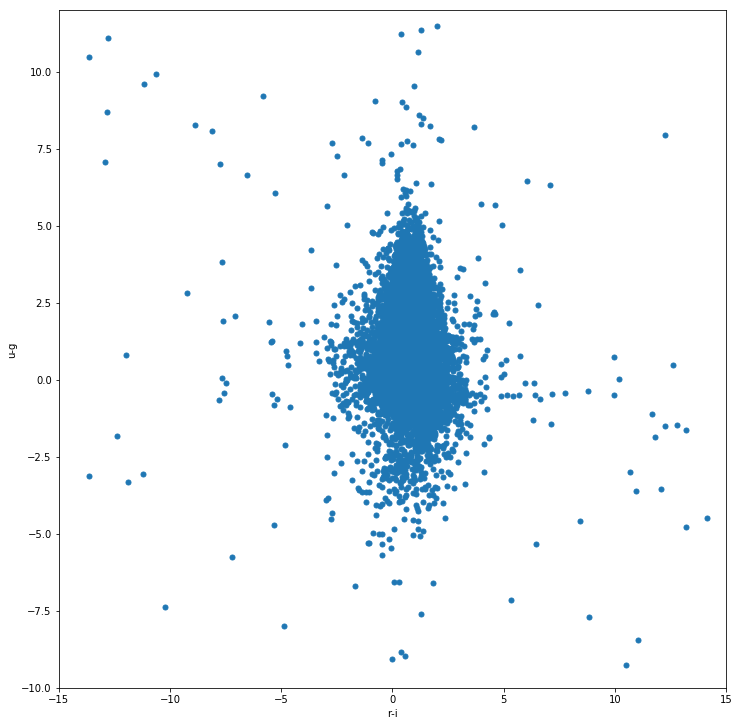

In [25]:
#r - i vs u - g for large radius
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,10)
fig.tight_layout()


x_axis = M67['r'][mask_large_r] - M67['i'][mask_large_r]
y_axis = M67['u'][mask_large_r] - M67['g'][mask_large_r]

ax.set_xlabel("r-i")
ax.set_ylabel("u-g")
plt.ylim(-10,12)
plt.xlim(-15,15)

ax.plot(x_axis,y_axis,marker="o",linestyle="None",markersize=5);

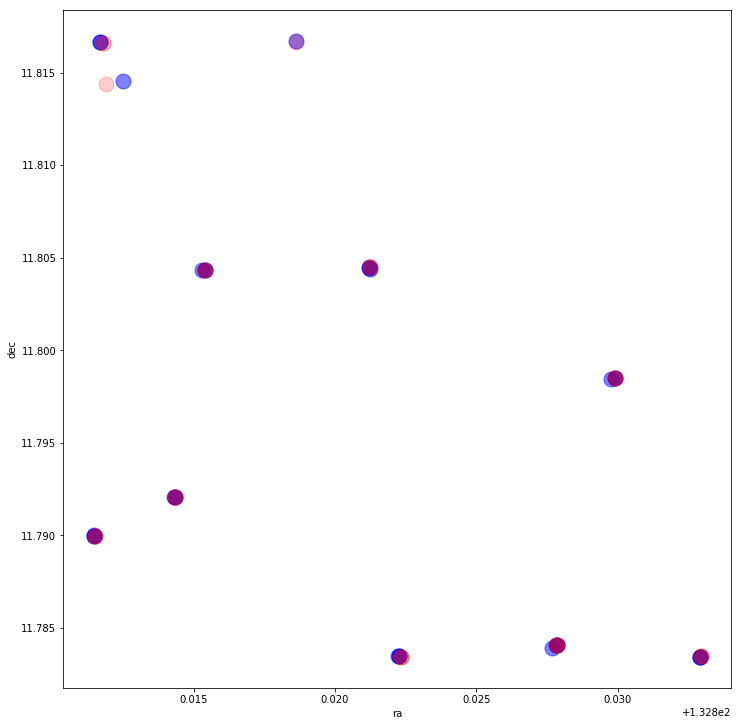

In [26]:
#star positions in the two surverys plotted on top of one another
#SDSS positions are in blue, WISE positions are in red

fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,10)
fig.tight_layout()


ra_SDSS = M67_Crossmatch['ra']
dec_SDSS = M67_Crossmatch['dec']
ra_WISE = M67_Crossmatch['ra_']
dec_WISE = M67_Crossmatch['dec_']

ax.set_xlabel("ra")
ax.set_ylabel("dec")


ax.plot(ra_SDSS,dec_SDSS,marker="o",linestyle="None",markersize=15, color='b', alpha = 0.5);
ax.plot(ra_WISE, dec_WISE, marker="o", linestyle="none", markersize=15, color='r', alpha = 0.2);

In [27]:
star1 = M67_Crossmatch[1]
star2 = M67_Crossmatch[2]
star3 = M67_Crossmatch[3]
star4 = M67_Crossmatch[4]
star5 = M67_Crossmatch[5]
star6 = M67_Crossmatch[6]
star7 = M67_Crossmatch[7]
star8 = M67_Crossmatch[8]
star9 = M67_Crossmatch[9]
star10 = M67_Crossmatch[10]

star1_SED = [[3543, 4770, 6231, 7625, 9134],[star1['u'], star1['g'], star1['r'], star1['i'], star1['z']]]
star2_SED = [[3543, 4770, 6231, 7625, 9134],[star2['u'], star2['g'], star2['r'], star2['i'], star2['z']]]
star3_SED = [[3543, 4770, 6231, 7625, 9134],[star3['u'], star3['g'], star3['r'], star3['i'], star3['z']]]
star4_SED = [[3543, 4770, 6231, 7625, 9134],[star4['u'], star4['g'], star4['r'], star4['i'], star4['z']]]
star5_SED = [[3543, 4770, 6231, 7625, 9134],[star5['u'], star5['g'], star5['r'], star5['i'], star5['z']]]
star6_SED = [[3543, 4770, 6231, 7625, 9134],[star6['u'], star6['g'], star6['r'], star6['i'], star6['z']]]
star7_SED = [[3543, 4770, 6231, 7625, 9134],[star7['u'], star7['g'], star7['r'], star7['i'], star7['z']]]
star8_SED = [[3543, 4770, 6231, 7625, 9134],[star8['u'], star8['g'], star8['r'], star8['i'], star8['z']]]
star9_SED = [[3543, 4770, 6231, 7625, 9134],[star9['u'], star9['g'], star9['r'], star9['i'], star9['z']]]
star10_SED = [[3543, 4770, 6231, 7625, 9134],[star10['u'], star10['g'], star10['r'], star10['i'], star10['z']]]

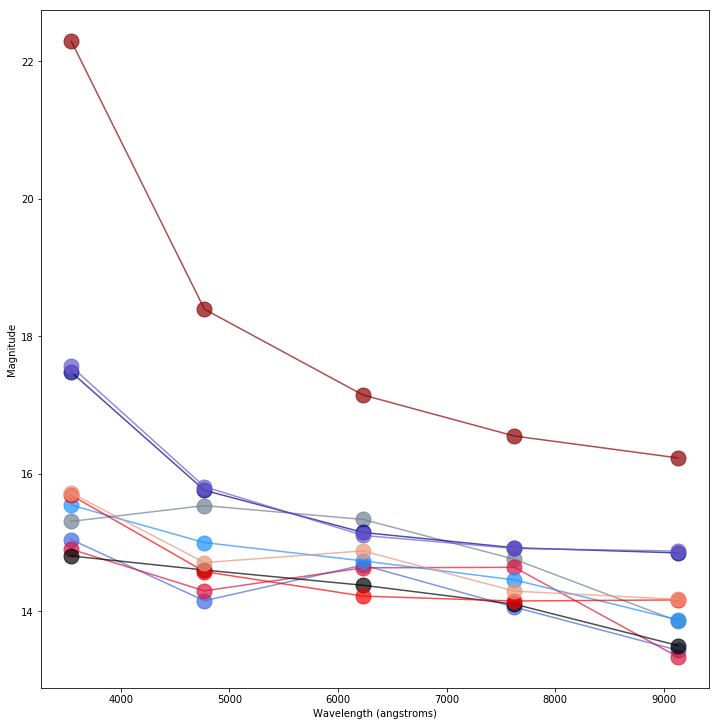

In [28]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,10)
fig.tight_layout()

ax.set_xlabel("Wavelength (angstroms)")
ax.set_ylabel("Magnitude")


ax.plot(star1_SED[0],star1_SED[1],marker="o",linestyle="-",markersize=15, color='slategray', alpha = 0.7);
ax.plot(star2_SED[0],star2_SED[1],marker="o",linestyle="-",markersize=15, color='royalblue', alpha = 0.7);
ax.plot(star3_SED[0],star3_SED[1],marker="o",linestyle="-",markersize=15, color='darkblue', alpha = 0.7);
ax.plot(star4_SED[0],star4_SED[1],marker="o",linestyle="-",markersize=15, color='slateblue', alpha = 0.7);
ax.plot(star5_SED[0],star5_SED[1],marker="o",linestyle="-",markersize=15, color='darkred', alpha = 0.7);
ax.plot(star6_SED[0],star6_SED[1],marker="o",linestyle="-",markersize=15, color='crimson', alpha = 0.7);
ax.plot(star7_SED[0],star7_SED[1],marker="o",linestyle="-",markersize=15, color='black', alpha = 0.7);
ax.plot(star8_SED[0],star8_SED[1],marker="o",linestyle="-",markersize=15, color='dodgerblue', alpha = 0.7);
ax.plot(star9_SED[0],star9_SED[1],marker="o",linestyle="-",markersize=15, color='red', alpha = 0.7);
ax.plot(star10_SED[0],star10_SED[1],marker="o",linestyle="-",markersize=15, color='darksalmon', alpha = 0.7);

In [29]:
star1_SED_WISE = [[3.4, 4.6, 12, 22],[star1['W1mag'], star1['W2mag'], star1['W3mag'], star1['W4mag']]]
star2_SED_WISE = [[3.4, 4.6, 12, 22],[star2['W1mag'], star2['W2mag'], star2['W3mag'], star2['W4mag']]]
star3_SED_WISE = [[3.4, 4.6, 12, 22],[star3['W1mag'], star3['W2mag'], star3['W3mag'], star3['W4mag']]]
star4_SED_WISE = [[3.4, 4.6, 12, 22],[star4['W1mag'], star4['W2mag'], star4['W3mag'], star4['W4mag']]]
star5_SED_WISE = [[3.4, 4.6, 12, 22],[star5['W1mag'], star5['W2mag'], star5['W3mag'], star5['W4mag']]]
star6_SED_WISE = [[3.4, 4.6, 12, 22],[star6['W1mag'], star6['W2mag'], star6['W3mag'], star6['W4mag']]]
star7_SED_WISE = [[3.4, 4.6, 12, 22],[star7['W1mag'], star7['W2mag'], star7['W3mag'], star7['W4mag']]]
star8_SED_WISE = [[3.4, 4.6, 12, 22],[star8['W1mag'], star8['W2mag'], star8['W3mag'], star8['W4mag']]]
star9_SED_WISE = [[3.4, 4.6, 12, 22],[star9['W1mag'], star9['W2mag'], star9['W3mag'], star9['W4mag']]]
star10_SED_WISE = [[3.4, 4.6, 12, 22],[star10['W1mag'], star10['W2mag'], star10['W3mag'], star10['W4mag']]]

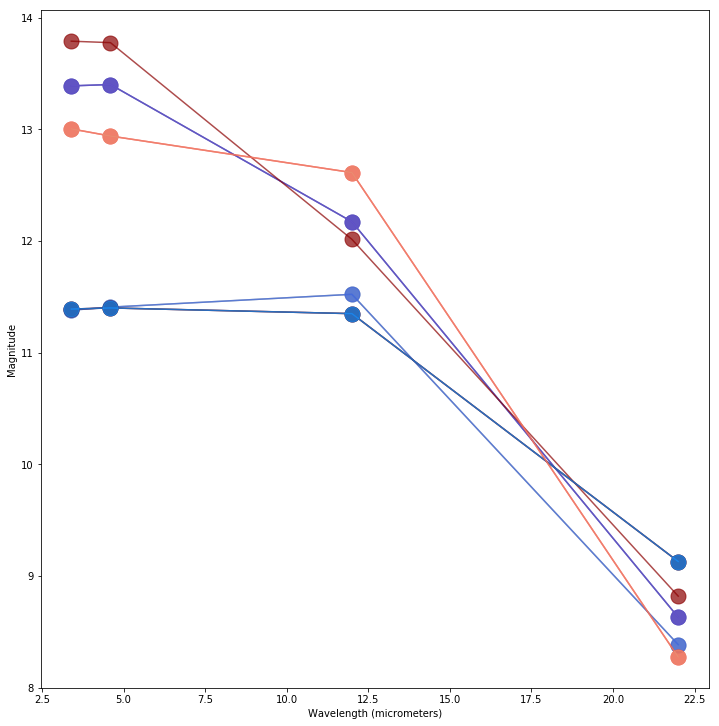

In [30]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,10)
fig.tight_layout()

ax.set_xlabel("Wavelength (micrometers)")
ax.set_ylabel("Magnitude")


ax.plot(star1_SED_WISE[0],star1_SED_WISE[1],marker="o",linestyle="-",markersize=15, color='slategray', alpha = 0.7);
ax.plot(star2_SED_WISE[0],star2_SED_WISE[1],marker="o",linestyle="-",markersize=15, color='royalblue', alpha = 0.7);
ax.plot(star3_SED_WISE[0],star3_SED_WISE[1],marker="o",linestyle="-",markersize=15, color='darkblue', alpha = 0.7);
ax.plot(star4_SED_WISE[0],star4_SED_WISE[1],marker="o",linestyle="-",markersize=15, color='slateblue', alpha = 0.7);
ax.plot(star5_SED_WISE[0],star5_SED_WISE[1],marker="o",linestyle="-",markersize=15, color='darkred', alpha = 0.7);
ax.plot(star6_SED_WISE[0],star6_SED_WISE[1],marker="o",linestyle="-",markersize=15, color='crimson', alpha = 0.7);
ax.plot(star7_SED_WISE[0],star7_SED_WISE[1],marker="o",linestyle="-",markersize=15, color='black', alpha = 0.7);
ax.plot(star8_SED_WISE[0],star8_SED_WISE[1],marker="o",linestyle="-",markersize=15, color='dodgerblue', alpha = 0.7);
ax.plot(star9_SED_WISE[0],star9_SED_WISE[1],marker="o",linestyle="-",markersize=15, color='red', alpha = 0.7);
ax.plot(star10_SED_WISE[0],star10_SED_WISE[1],marker="o",linestyle="-",markersize=15, color='darksalmon', alpha = 0.7);

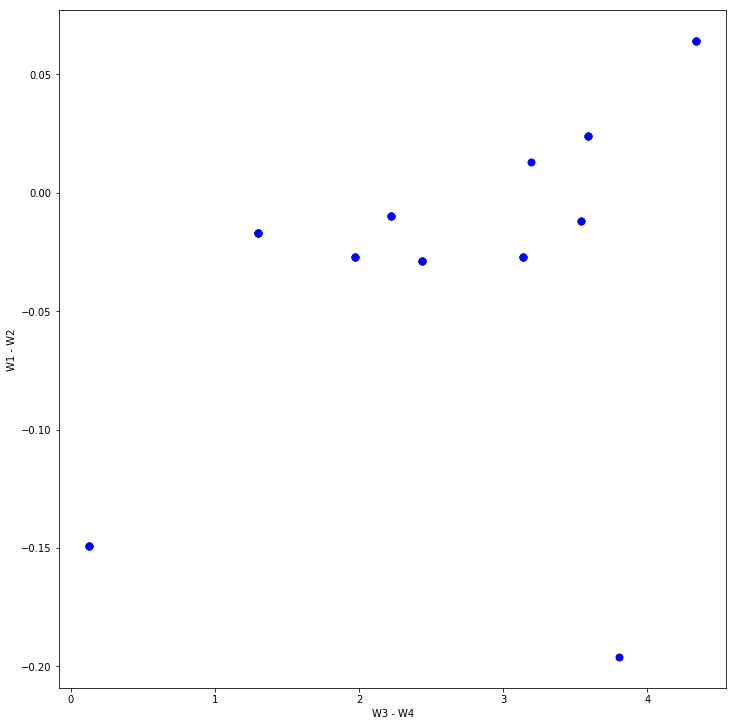

In [33]:
#Color-color diagram with WISE filters
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,10)
fig.tight_layout()


x_axis = M67_Crossmatch['W3mag'] - M67_Crossmatch['W4mag']
y_axis = M67_Crossmatch['W1mag'] - M67_Crossmatch['W2mag']

ax.set_xlabel("W3 - W4")
ax.set_ylabel("W1 - W2")


ax.plot(x_axis,y_axis,marker="o",linestyle="None",markersize=7, color='b');